# THE DATA ANALYSIS PROCESS

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. ASKING QUESTIONS

In [103]:
#WHAT ARE THE QUESTIONS THAT COME TO OUR MIND WHEN WE ARE PROVIDED WITH THIS DATASET?
#THE DATASET IN QUESTION IS THE DATA OF THE COUNTRIES OF THE WORLD(GDP,MORTALITY RATE, ETC)

In [104]:
country=pd.read_csv("cofworlds.csv")

In [105]:
country.head(2)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


The very first question we can get is, how many parameters or features are there in this data?
We Can get the answer to this by using the shape function

In [106]:
country.shape
#There are 20 unique features and a total of 227 rows in this data 

(227, 20)

We can conclude that this data contains the features of 227 countries from the data itself.

In [107]:
#The Basic Questions that surface after studying the data are as follows:

1.  What are the TOP 10 COUNTRIES based on Population?
2.  Which Countries have the highest Population Density?
3.  Which Region has the highest population?
4.  Population density vs Area
5.  Country with longest coastline.
6.  Highest Birthrate but lowest Deathrate
7.  Region having most no. of countries

# DATA WRANGLING

In [108]:
#We need to get rid of the unimportant parts of the data
#MISSING VALUES WILL HURT OUR ANALYSIS DUE TO ABSENCE OF DATA


In [109]:
#Getting rid of columns with missing data.
country=country.dropna()

In [110]:
country.shape

(179, 20)

In [111]:
a=country[country.columns[4:]].replace('[,]', '.', regex=True).astype(float).reset_index()
a.shape


(179, 17)

In [112]:
country=country.reset_index()
country=a.merge(country,on="index")
country.shape


(179, 37)

In [113]:
country.columns

Index(['index', 'Pop. Density (per sq. mi.)_x',
       'Coastline (coast/area ratio)_x', 'Net migration_x',
       'Infant mortality (per 1000 births)_x', 'GDP ($ per capita)_x',
       'Literacy (%)_x', 'Phones (per 1000)_x', 'Arable (%)_x', 'Crops (%)_x',
       'Other (%)_x', 'Climate_x', 'Birthrate_x', 'Deathrate_x',
       'Agriculture_x', 'Industry_x', 'Service_x', 'Country', 'Region',
       'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)_y',
       'Coastline (coast/area ratio)_y', 'Net migration_y',
       'Infant mortality (per 1000 births)_y', 'GDP ($ per capita)_y',
       'Literacy (%)_y', 'Phones (per 1000)_y', 'Arable (%)_y', 'Crops (%)_y',
       'Other (%)_y', 'Climate_y', 'Birthrate_y', 'Deathrate_y',
       'Agriculture_y', 'Industry_y', 'Service_y'],
      dtype='object')

In [114]:
country.drop(columns={'Pop. Density (per sq. mi.)_y',
       'Coastline (coast/area ratio)_y', 'Net migration_y',
       'Infant mortality (per 1000 births)_y', 'GDP ($ per capita)_y',
       'Literacy (%)_y', 'Phones (per 1000)_y', 'Arable (%)_y', 'Crops (%)_y',
       'Other (%)_y', 'Climate_y', 'Birthrate_y', 'Deathrate_y',
       'Agriculture_y', 'Industry_y', 'Service_y','index'},inplace=True)

In [115]:
country.rename(columns={'Pop. Density (per sq. mi.)_x':'Pop. Density',
       'Coastline (coast/area ratio)_x':'Coastline', 'Net migration_x':'Net migration',
       'Infant mortality (per 1000 births)_x':'Infant mortality', 'GDP ($ per capita)_x':'GDP',
       'Literacy (%)_x':'Literacy', 'Phones (per 1000)_x':'Phones', 'Arable (%)_x':'Arable', 'Crops (%)_x':'Crops',
       'Other (%)_x':'Others', 'Climate_x':'Climate', 'Birthrate_x':'Birthrate', 'Deathrate_x':'Deathrate',
       'Agriculture_x':'Agriculture', 'Industry_x':'Industry', 'Service_x':'Service'},inplace=True)

In [118]:

country.head()

,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Others,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region,Population,Area (sq. mi.)
0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500
1,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,Albania,EASTERN EUROPE,3581655,28748
2,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,Algeria,NORTHERN AFRICA,32930091,2381740
3,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,Anguilla,LATIN AMER. & CARIB,13477,102
4,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443


# EXPLORATORY DATA ANALYSIS

# Region having most no. of countries and least no. of countries.


In [54]:
most=country['Region'].value_counts().sort_values().tail(1)
least=country['Region'].value_counts().sort_values().head(1)

In [55]:
most

SUB-SAHARAN AFRICA                     47
Name: Region, dtype: int64

In [56]:
least

BALTICS                                2
Name: Region, dtype: int64

# Highest and lowest population among all countries

In [58]:
highest=country['Population'].sort_values().tail(1)
lowest=country['Population'].sort_values().head(1)

In [59]:
highest

37    1313973713
Name: Population, dtype: int64

In [60]:
lowest

3    13477
Name: Population, dtype: int64

# DATA VIZUALISATION

# BAR CHART OF COUNTRIES HAVING POPULATION>150 MILLION

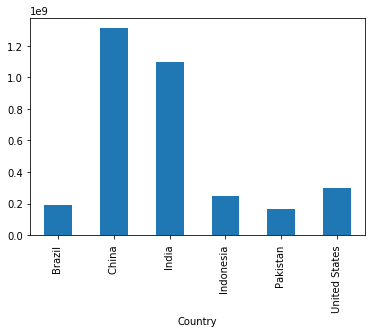

In [63]:
temp=country[country['Population']>150000000]
temp.set_index('Country')['Population'].plot(kind='bar')

# PIE CHART SHOWING WHICH REGION HAS WHAT PERCENTAGE OF COUNTRIES

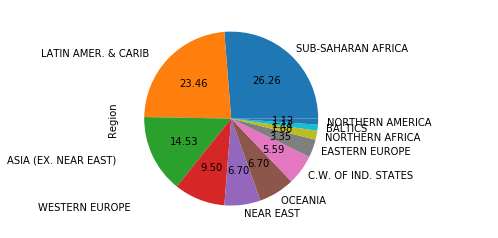

In [65]:
country['Region'].value_counts().plot(kind='pie',autopct='%0.2f')

# LITERACY RATE VIZUALISATIONS

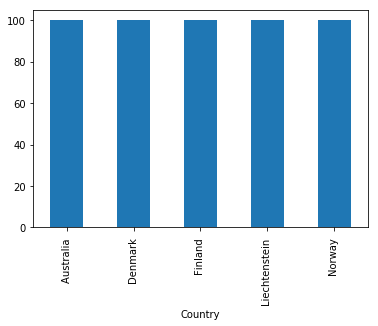

In [69]:
#Highest Literacy rate in the world
temp=country[country['Literacy']==100]
temp.set_index('Country')['Literacy'].plot(kind='bar')

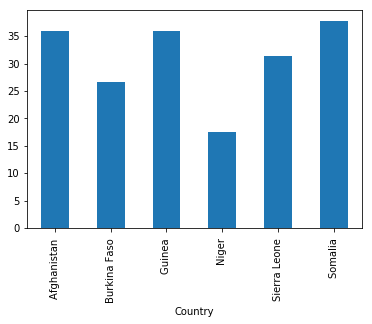

In [78]:
#Literacy Rates<40 in the world
temp=country[country['Literacy']<40]
temp.set_index('Country')['Literacy'].plot(kind='bar')

# BIRTHRATE AND DEATHRATE PLOTS

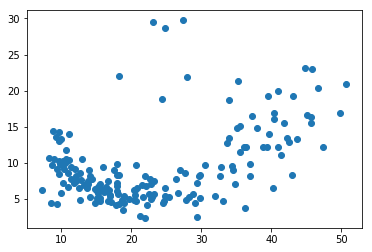

In [85]:
m=country['Birthrate'].values
n=country['Deathrate'].values
plt.scatter(m,n)

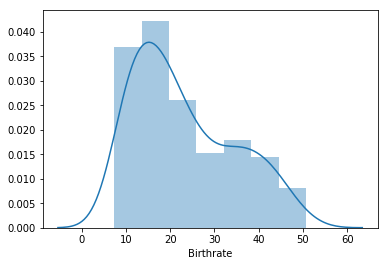

In [86]:
sns.distplot(country["Birthrate"])


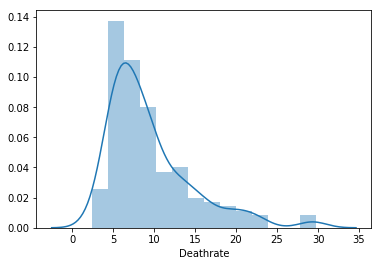

In [87]:
sns.distplot(country["Deathrate"])

# AREA RELATED ANALYSIS

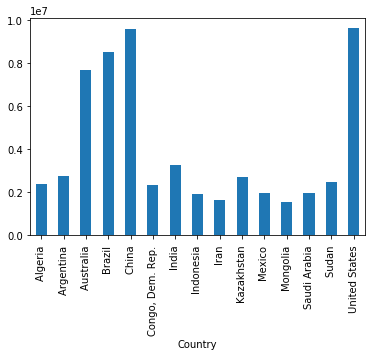

In [93]:
m=country[country['Area (sq. mi.)']>1500000]
m.set_index('Country')['Area (sq. mi.)'].plot(kind='bar')

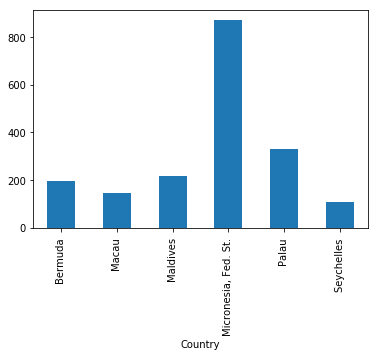

In [94]:
m=country[country['Coastline']>75]
m.set_index('Country')['Coastline'].plot(kind='bar')

# HEATMAPS SHOWCASING RELATIONS

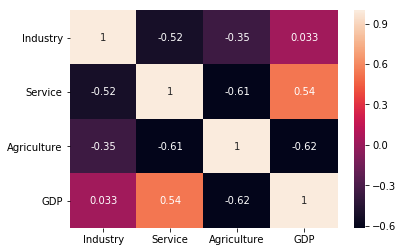

In [100]:
heat = sns.heatmap(country[['Industry','Service','Agriculture','GDP']].corr(),annot=True)
plt.show()

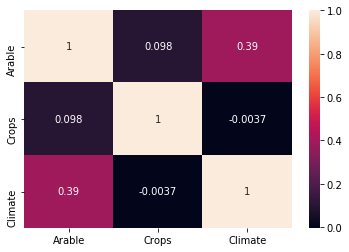

In [97]:
heat = sns.heatmap(country[['Arable','Crops','Climate']].corr(),annot=True)
plt.show() 